# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)



from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

pd.set_option("display.float_format", lambda x: "%.5f" % x)


import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV



import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [ ]:
leads_analysis = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/classification_and_hypothesis_testing/ExtraaLearn.csv")
leads_analysis_clone = leads_analysis.copy()
leads_analysis.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [ ]:
leads_analysis.shape

(4612, 15)

The dataset has 4612 rows and 15 columns

In [ ]:
print(leads_analysis.dtypes)

ID                        object
age                        int64
current_occupation        object
first_interaction         object
profile_completed         object
website_visits             int64
time_spent_on_website      int64
page_views_per_visit     float64
last_activity             object
print_media_type1         object
print_media_type2         object
digital_media             object
educational_channels      object
referral                  object
status                     int64
dtype: object


**Observations:**

The dataset contains a mix of numerical and categorical variables:

Identifier

ID (object): Unique identifier for each lead.

Numerical variables:

* age (integer)

* website_visits (integer)

* time_spent_on_website (integer)

* page_views_per_visit (float)

* status (integer, a target variable)

Categorical variables (object type):

* current_occupation

* first_interaction

* profile_completed

* last_activity

* Various media/channel types (print_media_type1, print_media_type2, digital_media, educational_channels, referral)

In [ ]:
print(leads_analysis.isnull().sum())

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


**Observations:**
* There are no missing values in any of the columns

* All 15 columns have complete data for all records

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
leads_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations**

**Like was already mentioned:**
* Columns age, website_visits, time_spent_on_website, page_viewsper_visit, status are numeric data types and the rest are of object data type.
*   There are no null entries (no missing values)
*   ID column doesn't hold any useful information for us. So, it can be deleted.





In [ ]:
duplicates_per_column = leads_analysis.apply(lambda col: col.duplicated().sum())
print(duplicates_per_column)

ID                          0
age                      4566
current_occupation       4609
first_interaction        4610
profile_completed        4609
website_visits           4585
time_spent_on_website    2989
page_views_per_visit     2198
last_activity            4609
print_media_type1        4610
print_media_type2        4610
digital_media            4610
educational_channels     4610
referral                 4610
status                   4610
dtype: int64


**Conclusion:**
The `ID` column contains no duplicates, as expected for a unique identifier. Duplicates in other columns are normal because they consist of categorical data with limited unique values.

In [ ]:
leads_analysis = leads_analysis.drop("ID", axis=1)

In [ ]:
leads_analysis.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


* Age: Mean 46.2 (18-63 range), median 51 (left-skewed)

* Visits: Averag 3.57 (0-30), 75th percentile = 5

* Time Spent: Average 724s (wide std dev 744s), median 376s (right-skewed)

**Outlier handling**

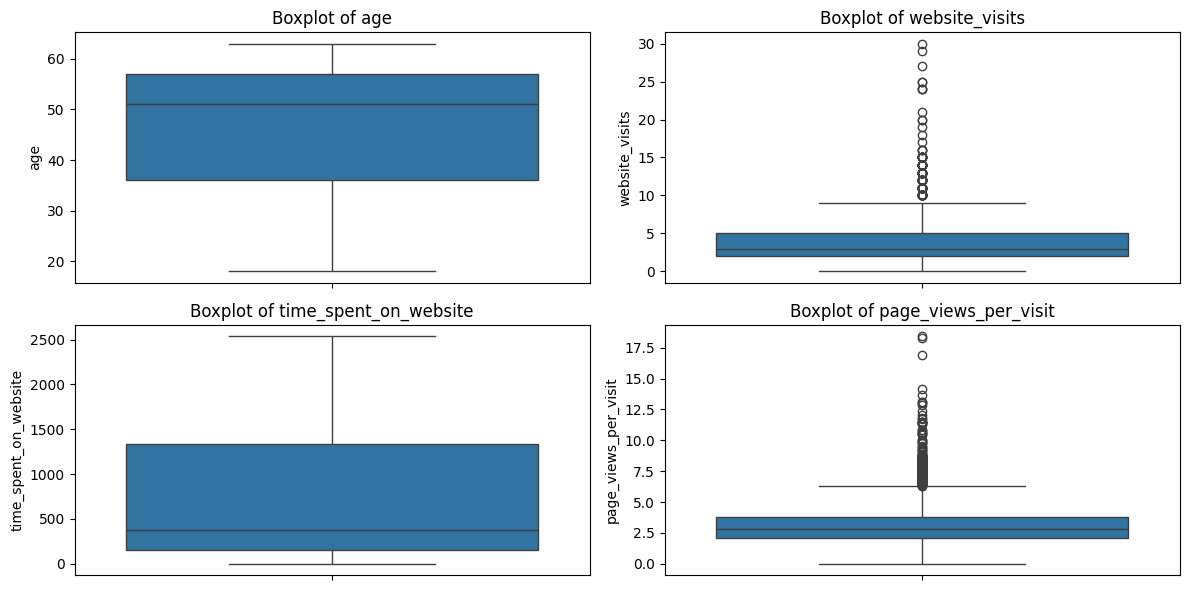

In [ ]:
# Select numerical columns (excluding 'status')
num_cols = leads_analysis.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('status')

# Create a boxplot for each numerical column

plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=leads_analysis[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

Observations in age:
* Likely no invalid data entries. The data is left-skewed.

Observations in website visits:
* Seems like the Website Visits graph is extremely right-scewed. It will be useful to remove the extreme outliers so that the data analysis is not affected by outliers.

* Page views per visit is also highly right scewed.

In [ ]:
upper_limit = np.percentile(leads_analysis['website_visits'], 98)
leads_analysis['website_visits'] = np.minimum(leads_analysis['website_visits'], upper_limit)

In [ ]:
upper_limit1 = np.percentile(leads_analysis['page_views_per_visit'], 98)
leads_analysis['page_views_per_visit'] = np.minimum(leads_analysis['page_views_per_visit'], upper_limit1)

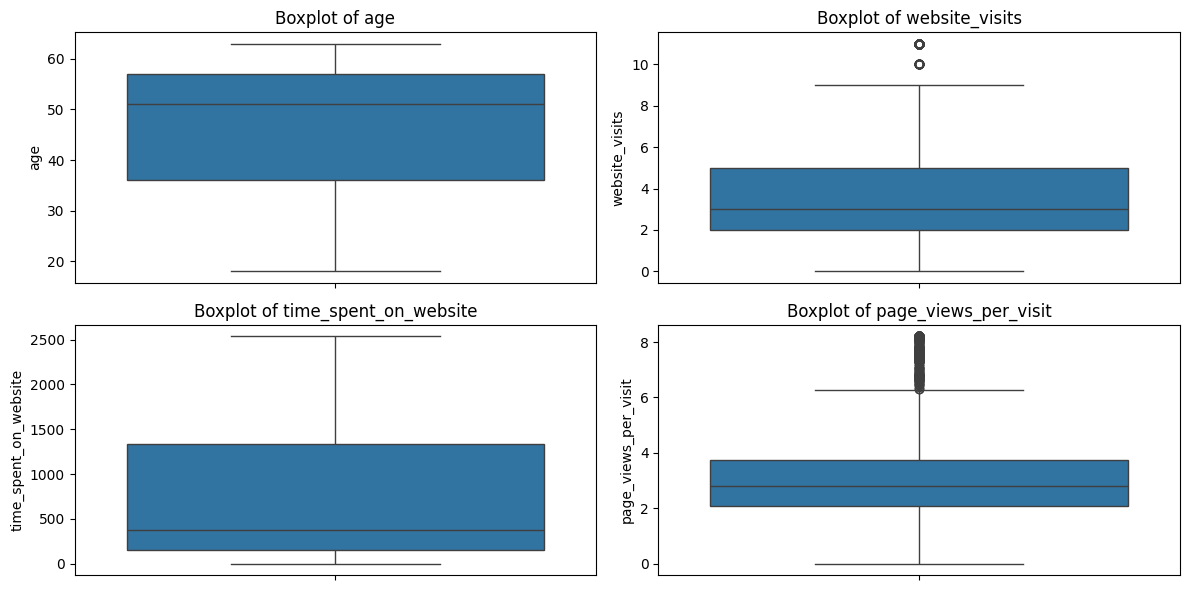

In [ ]:
# Select numerical columns (excluding 'status')
num_cols = leads_analysis.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('status')

# Create a boxplot for each numerical column

plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=leads_analysis[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

**Observations:**

Extreme values beyond the 98th percentile are trimmed but not deleted. 98% of original values remain unchanged.this reduces skewness for better visualization/modeling.

In [ ]:
# List of all important categorical variables
cat_col = ["current_occupation", "first_interaction", 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', "educational_channels", "referral"]

# Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(leads_analysis[column].value_counts(1))
    print("-" * 50)

current_occupation
Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website      0.55117
Mobile App   0.44883
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High     0.49089
Medium   0.48591
Low      0.02320
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No    0.89224
Yes   0.10776
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No    0.94948
Yes   0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No    0.88573
Yes   0.11427
Name: proportion, dtype: float64
-----------------

**Observations:**

Most users are Professionals (56.72%), followed by Unemployed (31.25%) and Students (12.03%).

First interaction is slightly more via Website (55.12%) than Mobile App (44.88%).

Profile completion is almost evenly split between High (49.09%) and Medium (48.59%), with very few Low (2.32%).

Last activity is mostly Email (49.39%), followed by Phone (26.76%) and Website (23.85%).

Most users do not engage with print/digital media or educational channels (high "No" proportions).

Referrals are rare (only 2.02% come via referrals).

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

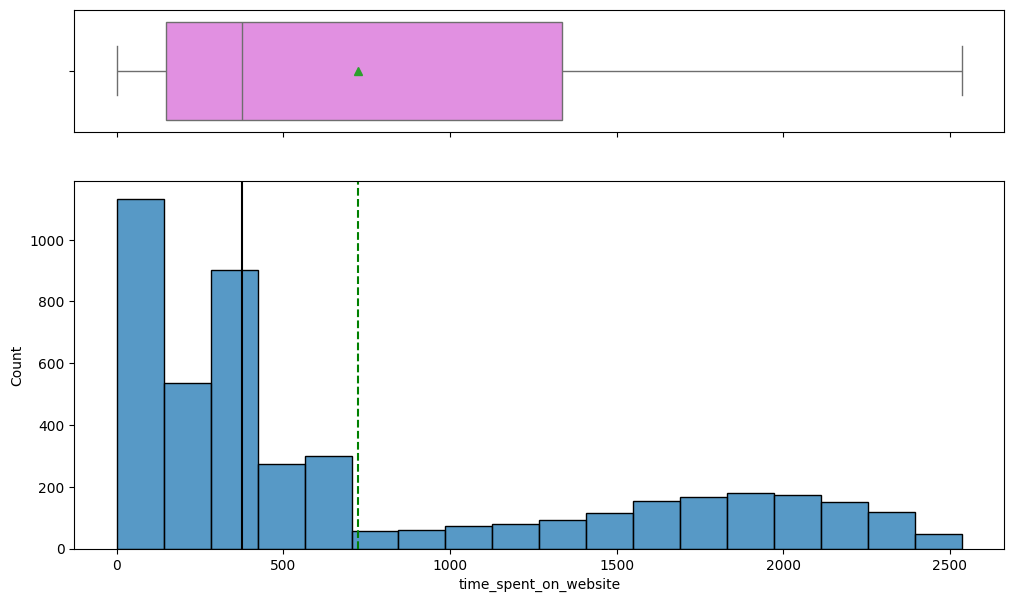

In [ ]:
histogram_boxplot(leads_analysis, 'time_spent_on_website')
plt.show()

Time spent of website is right-scewe with the median roughly at 400 and the mean roughly at 720.

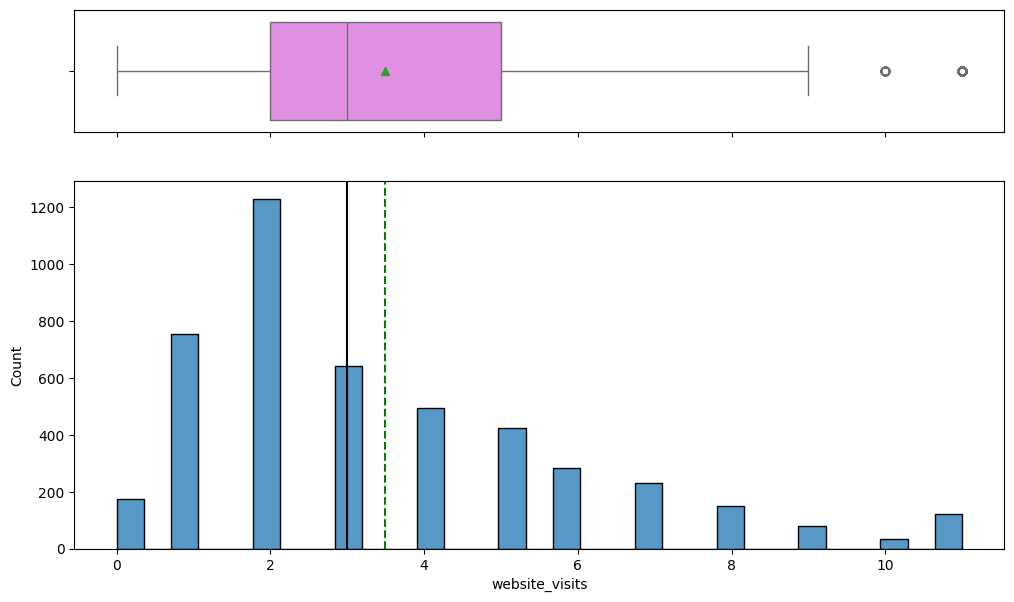

In [ ]:
histogram_boxplot(leads_analysis, 'website_visits')
plt.show()

Website visits is right scewed with a median at 3 and mean at 3.5.

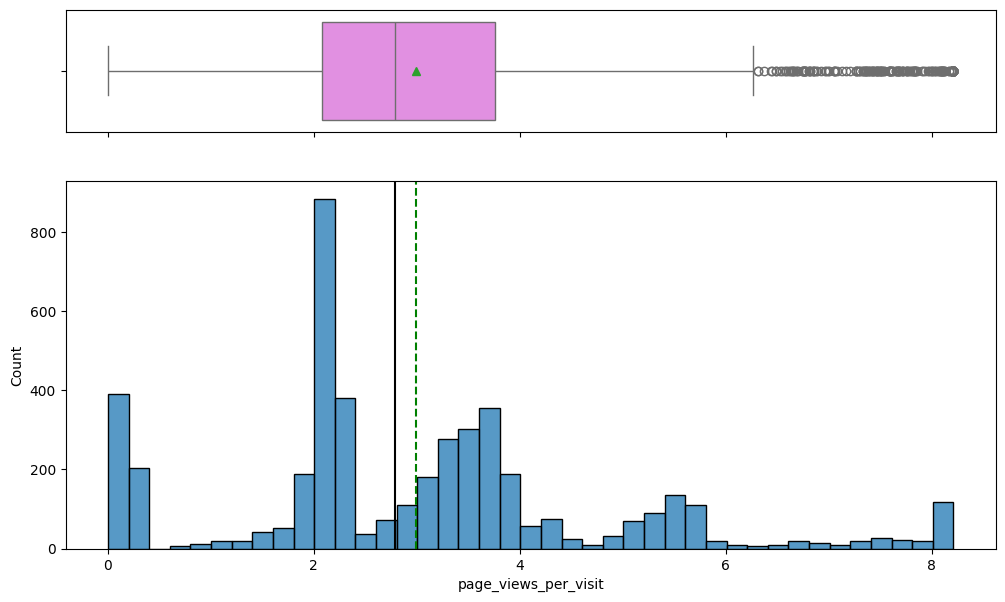

In [ ]:
histogram_boxplot(leads_analysis, 'page_views_per_visit')
plt.show()

**page_views_per_visit** has median at roughly 2.8 and mean at 3 and it is right-scewed.

This is an interesting histogram. It seems like it contains multiple sub histograms.

This might indicate mixed user behavior (sub groups): light users 1-2 times, medium users 3-6, users that view the page a lot 7+)

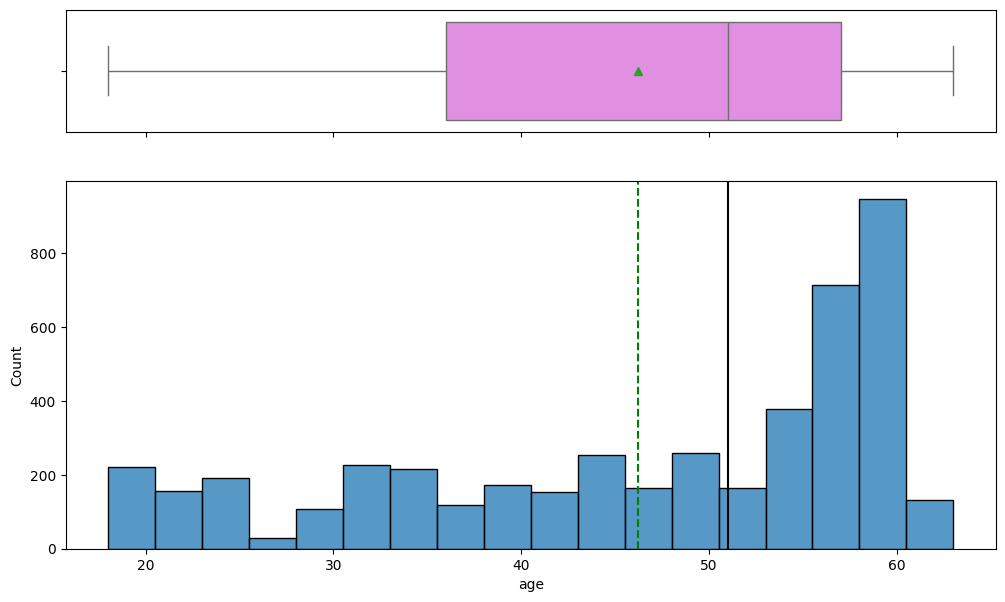

In [ ]:
histogram_boxplot(leads_analysis, 'age')
plt.show()

The age column is left-skewed, mean is roughly at 46 and median is roughly at 51.

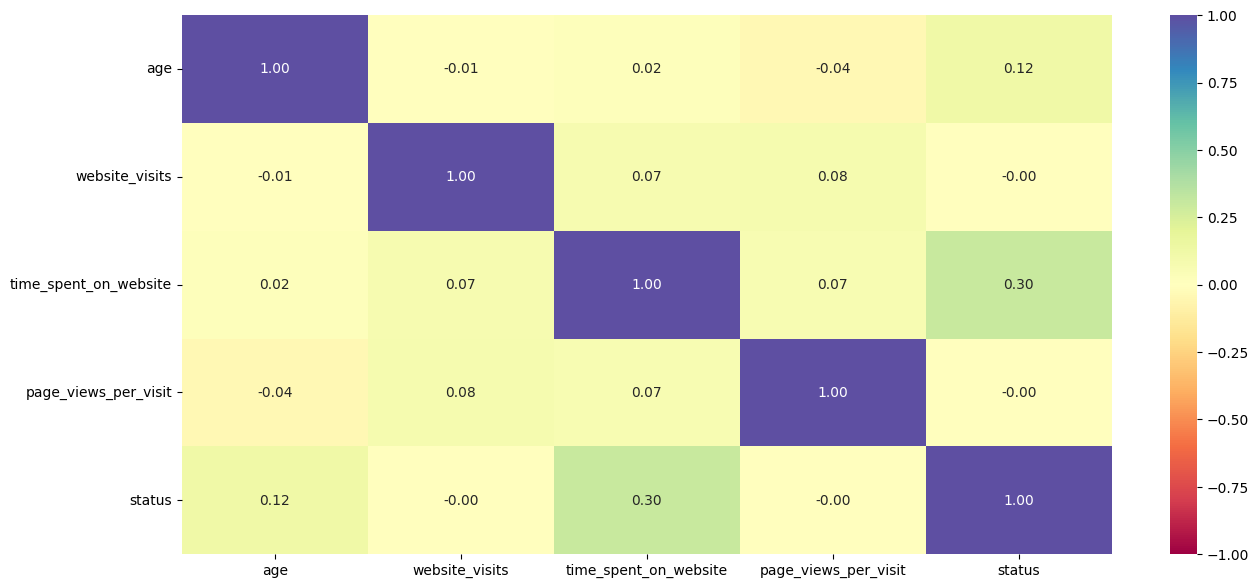

In [ ]:
# Exclude non-numeric columns
numeric_data = leads_analysis.select_dtypes(include=np.number)

# Create heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**

Strongest Predictor of Conversion:

* time_spent_on_website has the highest correlation with status (0.30)

Unexpected outcomes:

* website_visits and page_views_per_visit show near-zero correlation with conversion (-0.00)
* age has weak but noticeable positive correlation (0.12)

In [ ]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

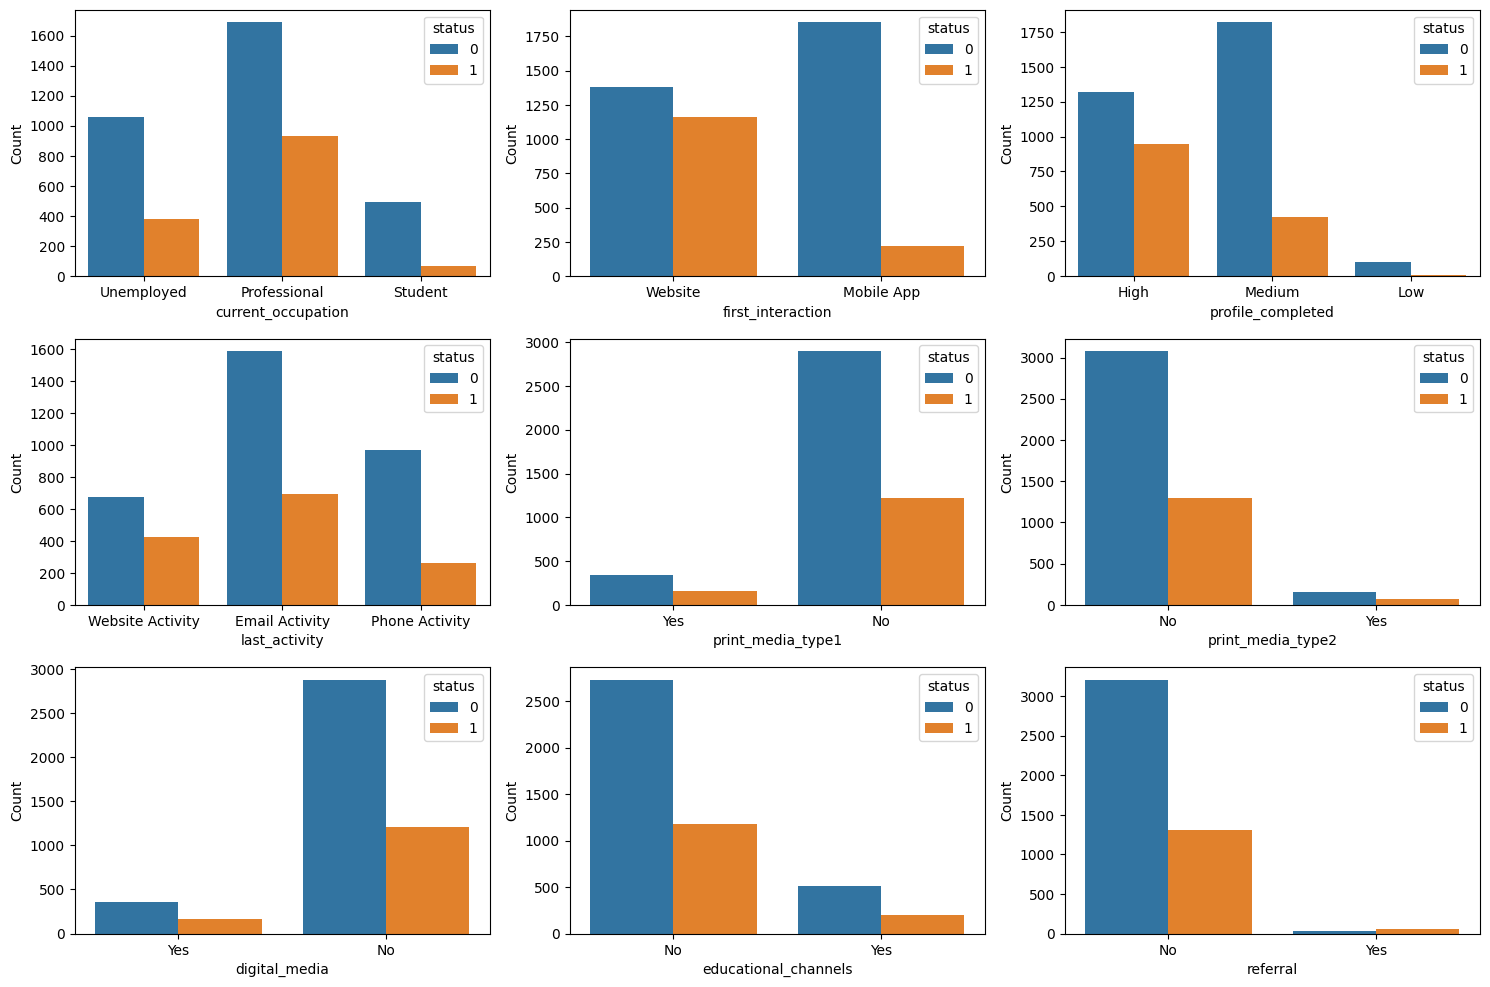

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_col, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=leads_analysis, x=col, hue="status")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Observations:**

**Occupation Matters**

- Professionals show the highest conversion rates, likely due to greater purchasing power.

- Unemployed individuals convert but at lower frequencies.

- Students rarely convert, suggesting limited need or budget for the offering.

**First Interaction Channel**

Leads who first engaged via the website (vs. mobile app) are more likely to convert, possibly indicating:

- Better UX on the web version

- Higher intent when using desktop devices

**Profile Completion Signals Intent**

- High completion - High conversion: Complete profiles correlate with serious intent.

- Low completon - Low conversion: Incomplete profiles may indicate windowshoppers.

**Last Activity Matters**

Email activity (e.g., opening campaigns) strongly predicts conversion, outperforming phone activity  and website revisits.

**Marketing Channels Show Minimal Impact**

Print/Digital ads: Negligible effect on conversions.

Educational channels: Slightly better but still weak.

Referrals: No measurable impact.

## Building a Decision Tree model

**Comments:**

Before we proceed to build a model, we'll have to encode categorical features.
Separate the independent variables and dependent Variables.
We'll split the data into train and test to be able to evaluate the model that we train on the training data.

In [ ]:
# Creating metric function for aa nicer presentation
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
# Separating independent variables and the target variable
x = leads_analysis.drop('status',axis=1)

y = leads_analysis['status']

In [ ]:
leads_analysis = pd.get_dummies(
    leads_analysis,
    columns = leads_analysis.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [ ]:
# Splitting the dataset into train and test datasets 80-20
# Reasoning: Andrew Ng’s Rule of Thumb
# In his Machine Learning Yearning (Chapter 11), Andrew Ng suggests:
# Small datasets (1k–10k rows): Use 70/30 or 80/20 splits.
# even smaller datasets use 90/10,
# since our dataset is much smaller than 10k but larger than 1k we can use 80/20
# This will ensure there is enough training for the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [ ]:
#we want to prioritize leads that convert (class 1)
# over non-converting leads (class 0), assigning class weights ({0: 0.3, 1: 0.7})
dt = DecisionTreeClassifier(class_weight={0: 0.30, 1: 0.70}, random_state=1)
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

In [ ]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (3689, 16)
Shape of test set :  (923, 16)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



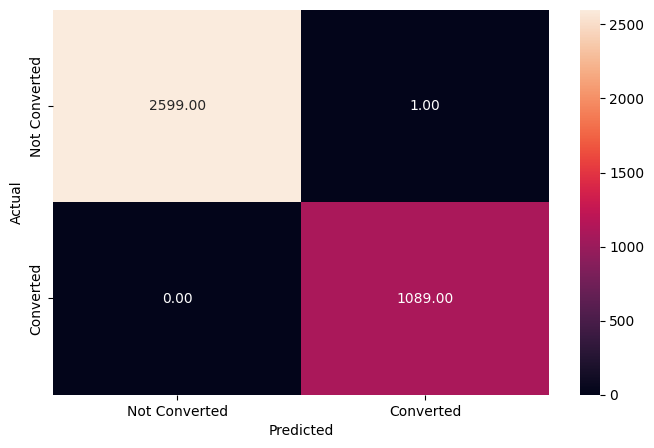

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

 decision tree is giving a 100% score for all metrics on the training dataset, which means overfitting

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       635
           1       0.71      0.65      0.68       288

    accuracy                           0.81       923
   macro avg       0.78      0.76      0.77       923
weighted avg       0.80      0.81      0.80       923



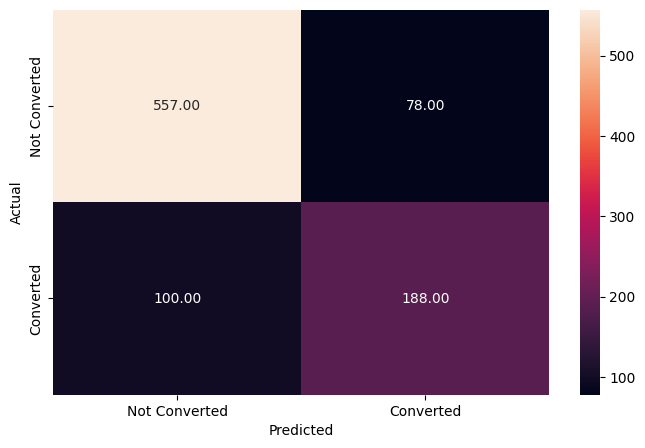

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

- Recall is not very high - 0.65

- The model identifies 65% of actual converters but misses 35% (false negatives).

- The earlier training recall was 1.0, indicating severe overfitting.

- Precision is 0.71

- 29% (1 - 0.71) of predicted converters are false positives (leads incorrectly flagged as "likely to join").

- Business Impact: Wasted resources (time/budget) on low-potential leads.

In [ ]:
'''
Hyperparameter tuning is process of systematically searching
for the optimal combination of parameters that control the learning process of machine learning model.
For decision trees proper tuning can significantly improve performance andpreventing overfitting.
'''
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import recall_score, make_scorer, classification_report
# Initialize classifier with balanced class weights
d_tree_tuned = DecisionTreeClassifier(
    random_state=7,
    class_weight={0: 0.3, 1: 0.7}
)

# Define hyperparameter grid
parameters = {
    'max_depth': np.arange(2, 10),
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [5, 10, 20, 25],
    'min_impurity_decrease': [0.0, 0.01, 0.05]
}

# Use stratified K-fold for imbalanced data
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Create custom scorer focusing on recal for class 1
scorer = make_scorer(recall_score, pos_label=1)

# Configure GridSearchCV
grid_obj = GridSearchCV(
    estimator=d_tree_tuned,
    param_grid=parameters,
    scoring=scorer,
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)


grid_obj.fit(x_train, y_train)


best_params = grid_obj.best_params_
print("Optimal Hyperparameters:")
for param, value in best_params.items():
    print(f"{param:>25}: {value}")

# Get best estimator
d_tree_tuned = grid_obj.best_estimator_

# Train thefinal model on full training data
d_tree_tuned.fit(x_train, y_train)

# Generate performance report
print("\nModel Performance:")
y_pred = d_tree_tuned.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['Not Converted', 'Converted']))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Optimal Hyperparameters:
                criterion: entropy
                max_depth: 3
    min_impurity_decrease: 0.0
         min_samples_leaf: 5

Model Performance:
               precision    recall  f1-score   support

Not Converted       0.93      0.75      0.83       635
    Converted       0.61      0.88      0.72       288

     accuracy                           0.79       923
    macro avg       0.77      0.81      0.78       923
 weighted avg       0.83      0.79      0.80       923



Search Proces has evaluated 192 parameter combinations with 5-fold cross-validation (960 total model fits).

- High recall (0.88) for "Converted" class - identifies 88% of actual conversions

- But moderate precision (0.61) - 39% of predicted conversions are false positives

Non-Conversion Accuracy:

- Excellent precision (0.93) - very few false alarms

- Lower recall (0.75) - misses 25% of non-conversions

Business Impact:

- Strength: Effective at identifying most conversions (low false negatives)

Risk: May waste resources on 39% falsely predicted conversions

<Axes: xlabel='Importance', ylabel='None'>

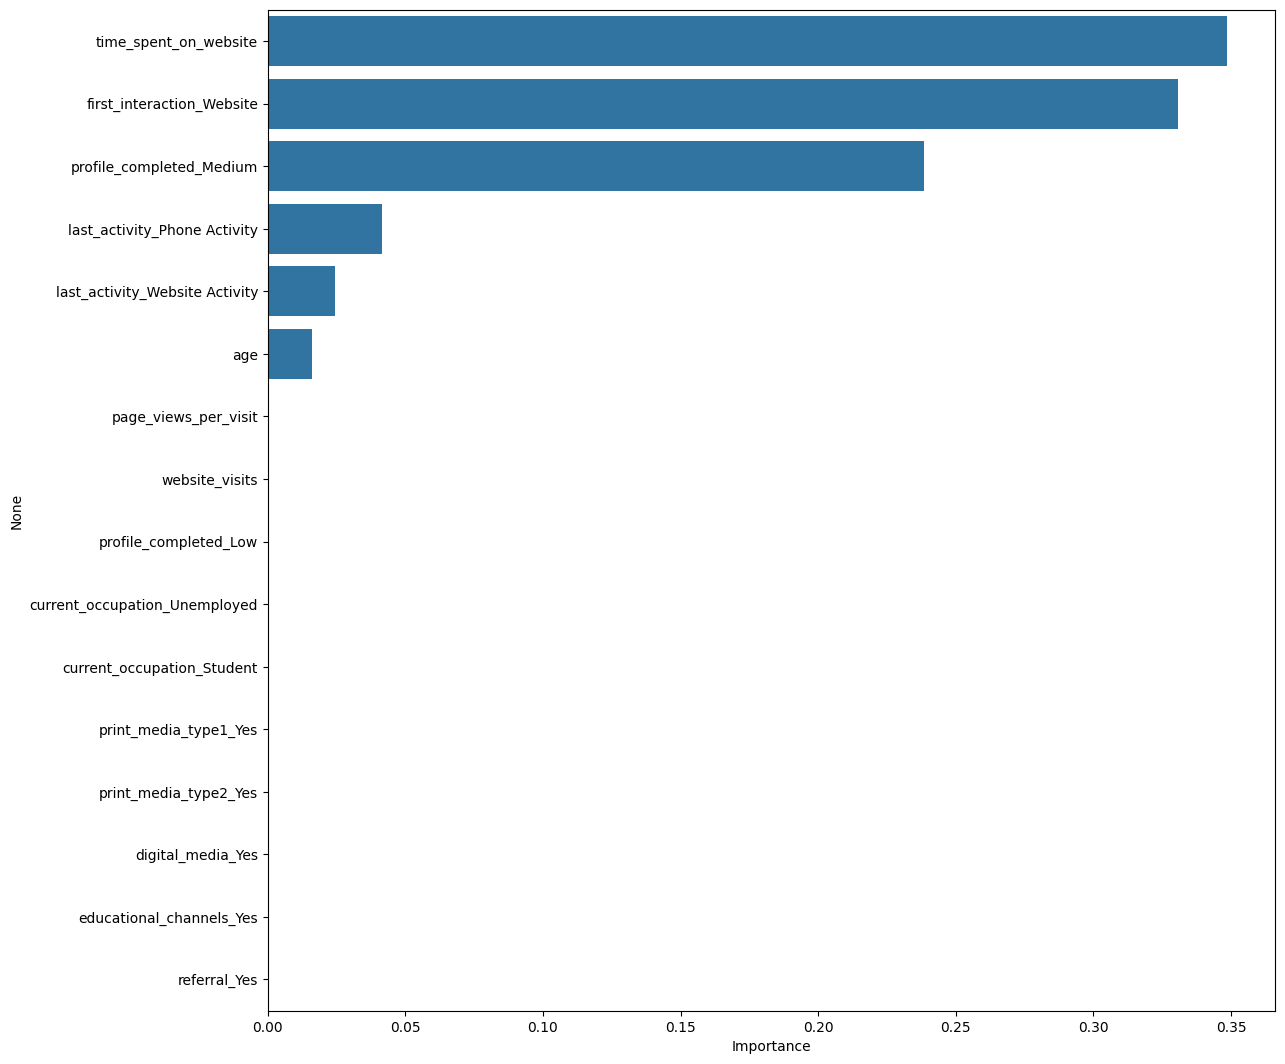

In [ ]:
# Plot the feature importance

importances = d_tree_tuned.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations:**

- According to the Decision Tree, time_spent_on_website is the most important feature, followed by first_interaction_website, profile_completed_Medium etc.
- This could mean that the leads that spend more time on the website of the company, have completed their profile to a medium-full state are more likely to become leads.


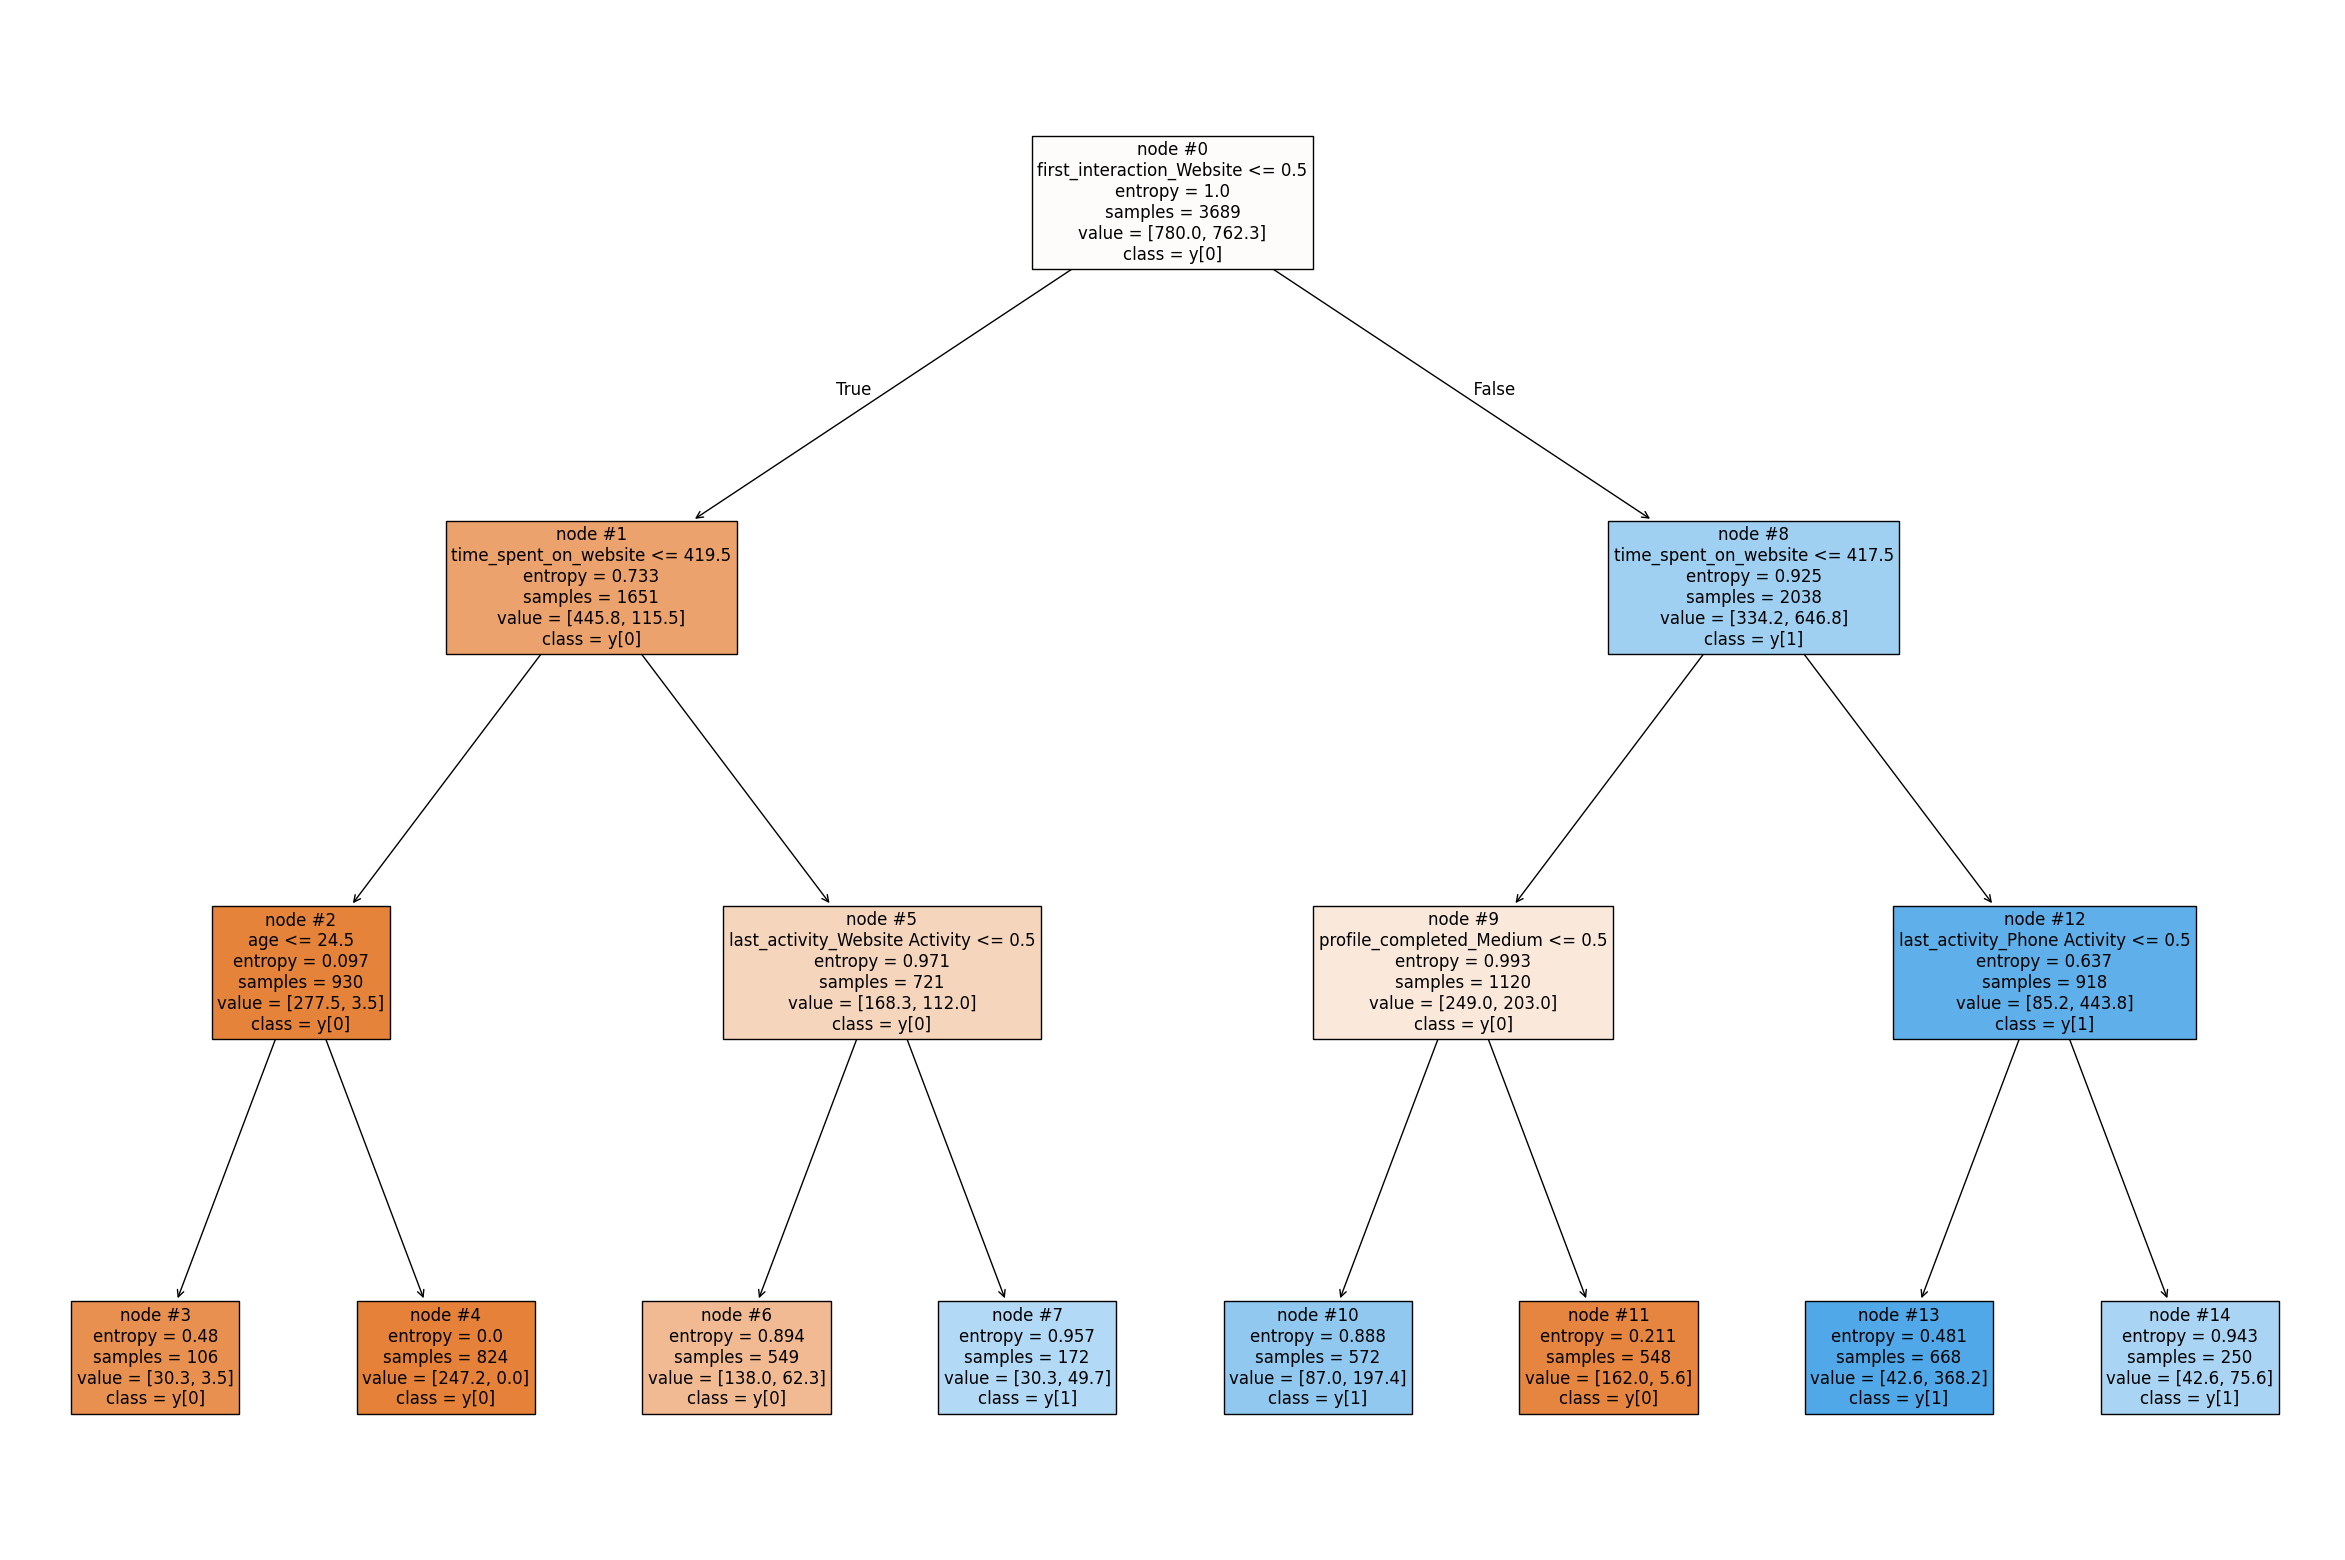

In [ ]:
# plotting the tree
features = list(x.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(d_tree_tuned, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

Blue leaves represent the joining, i.e., y[1] and the orange leaves represent the not joining, i.e., y[0]. Also, the more the number of observations in a leaf, the darker its color gets

## Do we need to prune the tree?

Yes, the pruning is needed because there is high training accuracy but low test accuracy/ the model performs well on training data but poorly on test data (overfitting)

In [ ]:
# Pruned Decision Tree
pruned_tree = DecisionTreeClassifier(
    random_state=1,
    criterion='entropy',
    max_depth=8,
    min_samples_leaf=5,
    ccp_alpha=0.01
)

# Fit and evaluate
pruned_tree.fit(x_train, y_train)
y_pred_tree = pruned_tree.predict(x_test)
print(classification_report(y_test, y_pred_tree))


              precision    recall  f1-score   support

           0       0.89      0.87      0.88       635
           1       0.73      0.76      0.75       288

    accuracy                           0.84       923
   macro avg       0.81      0.82      0.81       923
weighted avg       0.84      0.84      0.84       923



**Observations:**

- The accuracy improved 79% accuracy → 84% accuracy.
Better Precision-Recall Tradeoff: Higher precision for Class 1 ("Converted") at the cost of recall (fewer false positives but more false negatives).

- Overall Improvement: Weighted F1-score increased from 0.80 to 0.84, indicating better overall performance.

## Building a Random Forest model

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



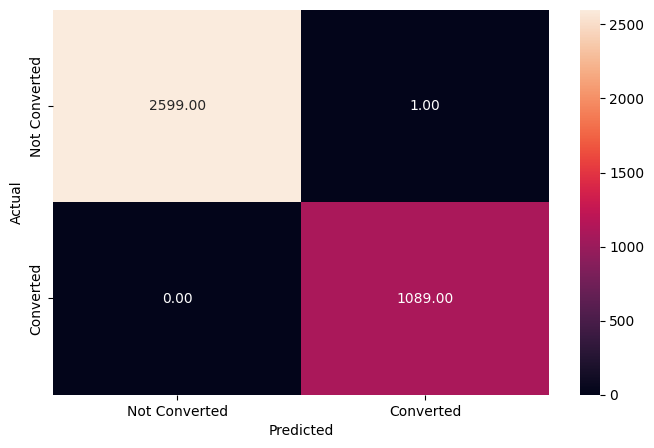

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

For all metrics in the training dataset the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       635
           1       0.83      0.72      0.77       288

    accuracy                           0.87       923
   macro avg       0.85      0.83      0.84       923
weighted avg       0.86      0.87      0.86       923



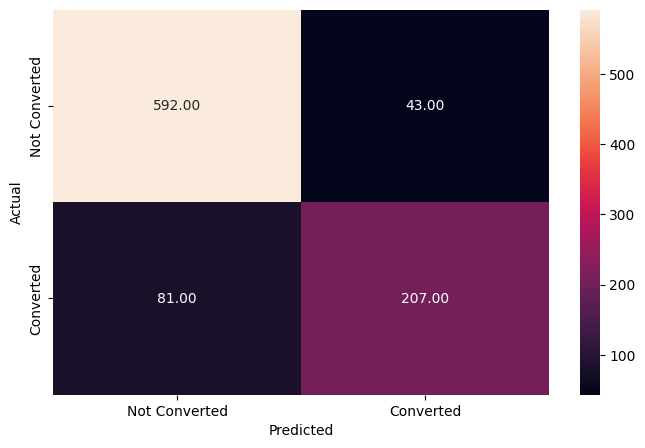

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

The Random Forest classifier seems to be overfitting the training data earlier. The recall on the training data is 1, while the recall on the test data is only ~ 0.72 for class 1.
Precision is 83% for the class 1.

In [ ]:
# param_grid: Defines the Hyperparameter Search Space
param_grid = {
    'n_estimators': [100, 200],   # Number of trees in the forest.
    'max_depth': [5, 10, None],   # max depth of each tree
    'min_samples_leaf': [5, 10],  # min samples required to be a leaf node
    'max_features': ['sqrt', 0.8] # features considered for splitting
}

# gridsearchCV orchestrates the search
grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=1),
    param_grid, cv=5, scoring='f1_weighted'
)
grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_

In [ ]:
y_pred = best_rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       635
           1       0.79      0.78      0.78       288

    accuracy                           0.86       923
   macro avg       0.84      0.84      0.84       923
weighted avg       0.86      0.86      0.86       923



**Observations:**

- strong Performance for identifying non-converters:

- High precision/recall (90%) indicates reliable predictions for "Not Converted."

- Good but worse performance for "Converted":

- Precision (79%) and recall (78%) are balanced but lower than in "Not Converted", likely due to fewer samples (288 vs. 635).

No Severe Overfitting:

Test accuracy (86%) aligns with weighted metrics, suggesting generalization.

Higher Overall Accuracy (86% vs. 84% in pruned tree). This is expected, Random Forest reduces variance by averaging multiple trees, leading to better generalization.

<Axes: xlabel='Importance', ylabel='None'>

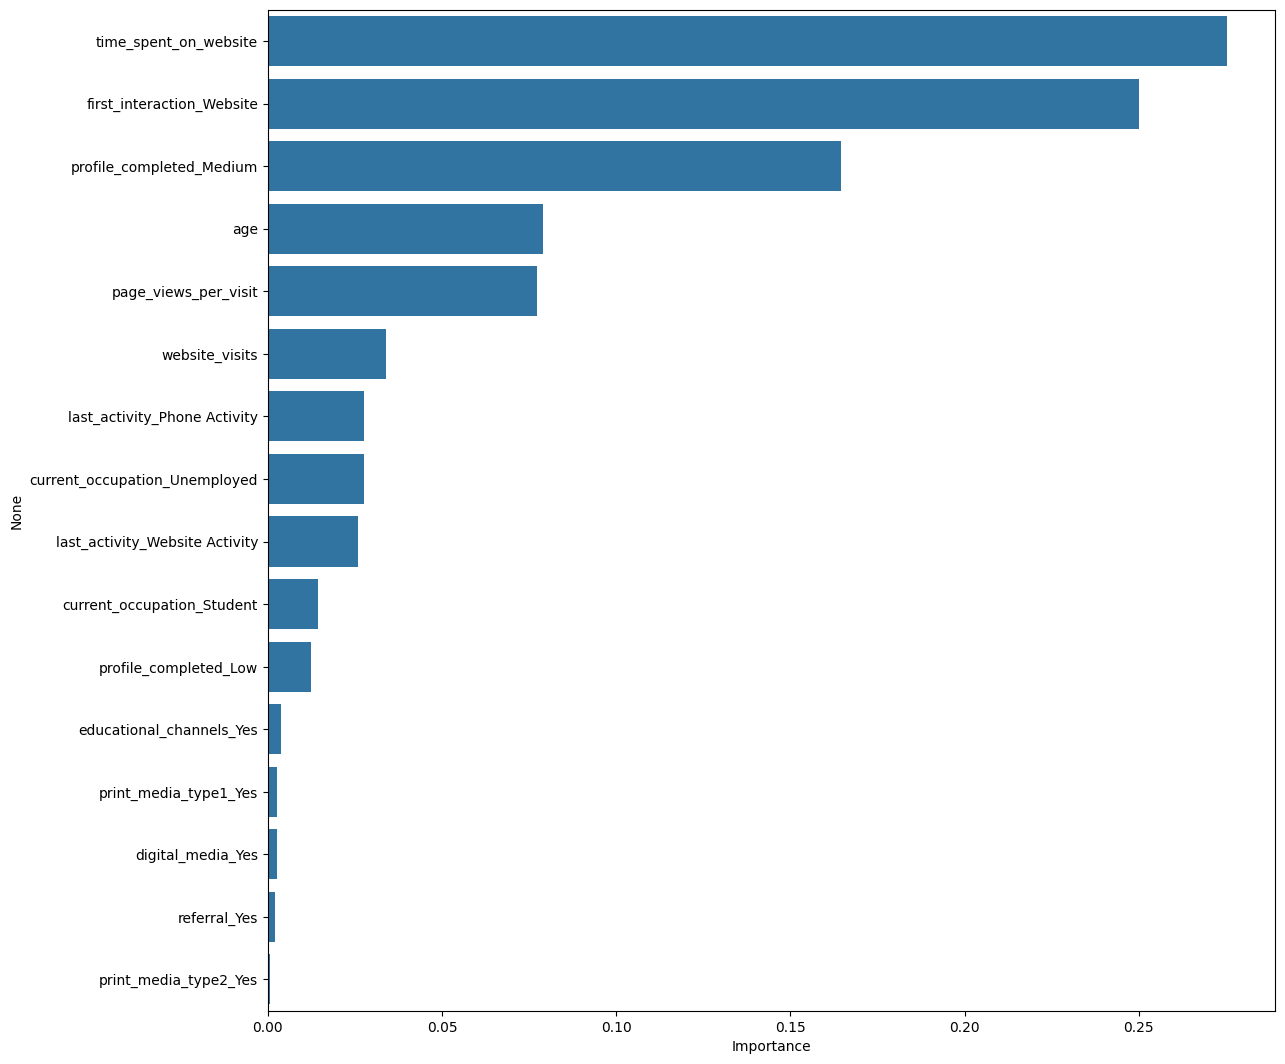

In [ ]:
importances = best_rf.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**time_spent_on_website**

 Users who spend more time are likely to convert.



**first_interaction_Website**

Ininitial website interaction is a strong conversion signal.



**profile_completed_Medium**

 Partial profile completion correlates with conversions.



## Do we need to prune the tree?

No, pruning is usually not applied to the random forest. Random forest relies on ensemble diversity: accumulating many unpruned noisy trees will reduce overall overfitting). Pruning harms ensemble diversity

## Actionable Insights and Recommendations

**Recommendations:**

1. Target Users Who Spend More Time on Website (time_spent_on_website is the top predictor).

**Action:**

- Engagement Campaigns: use personalized content ( pop-ups, chatbots) to extend session duration.

- Retargeting Ads: focus ads targeting users who spent long time on the website but didn’t convert.

- First-Time Website Visitors (first_interaction_Website is critical): the company needs to invest their resourses on website ads.


- Optimize landing Pages: simplify navigation and highlight value propositions.

- Incentivize Sign-Ups: offer discounts or free trials for first-time visitors.

2. Improve Profile Completion Rates
- Partial Profile Completion Matters (profile_completed_Medium is a key feature).

**Action:**

Gamify Onboarding: progress bars, badges, or rewards for completing profiles.

Reduce the threshold: pre-fill data (via social logins) and minimize required fields.

3. Optimize Marketing Spend
Reallocate budget from Low-Impact channels (e.g., last_activity_Phone Activity, marketing channels have weak or no impact).

**Action:**

Shift focus from phone-based campaigns to website and email marketing.

Test removing underperforming channels ( phone outreach) and measure impact.

4. Reduce False Positives (Cost Savings)
Current Precision for "Converted" = 79% → ~21% of predicted conversions are incorrect.

**Action:**

Refine Lead Scoring: Add a secondary manual check for users predicted as "Converted" but with low engagement.


5. Address False Negatives (Revenue Recovery)
Current Recall for "Converted" = 78% → ~22% of actual conversions are missed.

**Action:**

Retarget "Likely to Convert" Users: Use model scores to identify high-potential users who slipped through.

Offer Time-Limited Promos: Incentivize users with borderline engagement (e.g., those who spent 2–5 minutes).

6. Product & UX UI Tweaks
Increase Page Views per Visit (moderately important feature).

**Action:**

Recommend Related Content: "Customers who viewed X also liked Y."

Reduce Bounce Rate: Improve page load speed and mobile responsiveness.



